# Logistic Regression:

Classifying with supervised learning whether diabetic patients are readmitted, and if they are, if it's before or after 30 days.

Using the dataset from here: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# SMOTE
from imblearn.over_sampling import SMOTE

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import pickle

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and 

In [2]:
# Using scaled X_train and X_test because we will want to try regularization

with open("y_train_liv.pkl", 'rb') as picklefile: 
    y_train = pickle.load(picklefile)

with open("y_test_liv.pkl", 'rb') as picklefile: 
    y_test = pickle.load(picklefile)

with open("x_train_scaled_liv.pkl", 'rb') as picklefile: 
    x_train = pickle.load(picklefile)

with open("x_test_scaled_liv.pkl", 'rb') as picklefile: 
    x_test = pickle.load(picklefile)

## Converting to binary classes:

In [3]:
y_test = y_test.str.replace('>30','NO')
y_train = y_train.str.replace('>30','NO')

## Logistic regression with balanced class weights with test/train split (25% for test):

In [4]:
lrmodel = linear_model.LogisticRegression(class_weight="balanced")
lrmodel.fit(x_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# Predict on test
y_pred = lrmodel.predict(x_test)

# Score on test
score = metrics.accuracy_score(y_test, y_pred)
#print(score)
print("Accuracy: %.3f"% score)
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.670
              precision    recall  f1-score   support

         <30       0.19      0.57      0.28      2839
          NO       0.92      0.68      0.79     22190

    accuracy                           0.67     25029
   macro avg       0.56      0.62      0.53     25029
weighted avg       0.84      0.67      0.73     25029



## Logistic regression with cross-validation:

In [6]:
# 10-fold cross-validation with logistic regression
# stratifying the Kfold splits is default in CV
# returning the average f1_macro score
print(cross_val_score(lrmodel, x_train, y_train, cv=5, scoring='f1_macro').mean())

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

0.5272561563748424


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
y_test.unique()

array(['NO', '<30'], dtype=object)

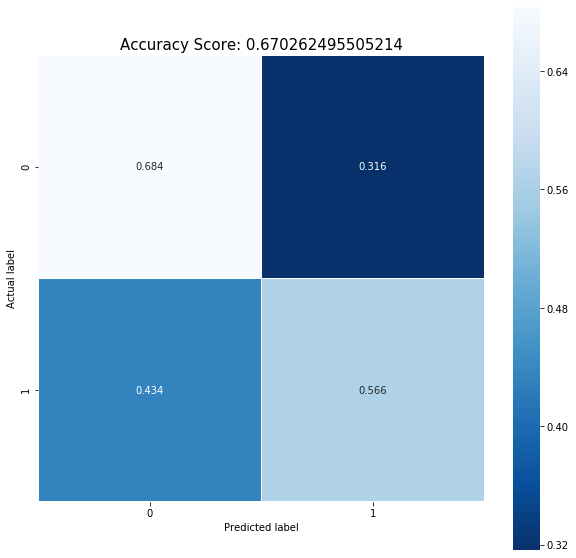

In [8]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=list(y_test.unique()))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [9]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[0.68359621, 0.31640379],
       [0.43395562, 0.56604438]])

In [10]:
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.670
              precision    recall  f1-score   support

         <30       0.19      0.57      0.28      2839
          NO       0.92      0.68      0.79     22190

    accuracy                           0.67     25029
   macro avg       0.56      0.62      0.53     25029
weighted avg       0.84      0.67      0.73     25029



In [11]:
lrmodel.coef_.shape

(1, 317)

## Get the coefficients:

In [12]:
coefficients = pd.DataFrame({"Feature":x_train.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

In [13]:
coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

In [14]:
coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Feature,Coefficients,abs_val_coef
61,discharge_disposition_id_Hospice / home,1.750175,1.750175
49,discharge_disposition_id_Discharged/transferre...,-1.508944,1.508944
58,discharge_disposition_id_Discharged/transferre...,-1.494286,1.494286
118,medical_specialty_Hematology,-1.389276,1.389276
216,"diag_3_Complications Of Pregnancy, Childbirth,...",1.126632,1.126632
196,"diag_2_Complications Of Pregnancy, Childbirth,...",1.075358,1.075358
134,medical_specialty_Otolaryngology,1.014054,1.014054
53,discharge_disposition_id_Discharged/transferre...,-1.006723,1.006723
141,medical_specialty_Pediatrics-Endocrinology,0.981267,0.981267
62,discharge_disposition_id_Hospice / medical fac...,0.947778,0.947778


## Grid search Logistic Regression:

In [15]:
# list(np.arange(0.0, 10.0, 0.1))

In [16]:
# define the parameter values that should be searched
C_range = list(np.arange(0.1, 5.2, 0.2))
print(f"testing values of C: {C_range}")

# Logistic regression defaults to L2 normalization

# create a parameter grid: map the parameter names to the values that should be searched 
param_grid = dict(C=C_range)

# instantiate the grid
grid = GridSearchCV(lrmodel, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

testing values of C: [0.1, 0.30000000000000004, 0.5000000000000001, 0.7000000000000001, 0.9000000000000001, 1.1000000000000003, 1.3000000000000003, 1.5000000000000004, 1.7000000000000004, 1.9000000000000004, 2.1000000000000005, 2.3000000000000007, 2.5000000000000004, 2.7000000000000006, 2.900000000000001, 3.1000000000000005, 3.3000000000000007, 3.500000000000001, 3.7000000000000006, 3.900000000000001, 4.1000000000000005, 4.300000000000001, 4.500000000000001, 4.7, 4.9, 5.1000000000000005]


In [17]:
# fit the grid with data 
grid.fit(x_train, y_train);

/usr/local/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
# view the complete results (list of named tuples)
# grid.grid_scores_ # old name for this function
grid.cv_results_

{'mean_fit_time': array([10.65380592, 10.6126194 , 10.39031701, 10.18648119, 10.17440667,
        10.38902926, 10.63782706, 10.61398916, 10.79053621, 10.49296846,
        10.54726992, 10.5582828 , 10.47963719, 10.62003789, 10.45378795,
        10.86197209, 10.91907597, 11.01838484, 11.17087007, 10.80050297,
        10.6886466 , 10.71587329, 10.72065959, 10.7770422 ,  8.73774238,
         7.64653211]),
 'std_fit_time': array([0.14800072, 0.14223578, 0.37594546, 0.11294156, 0.1444248 ,
        0.16760347, 0.10583314, 0.23252936, 0.16027968, 0.25235559,
        0.12743481, 0.12276896, 0.20955047, 0.08958301, 0.12674261,
        0.22395904, 0.13390933, 0.29349469, 0.2184719 , 0.18520161,
        0.14716836, 0.16032241, 0.1427443 , 0.10092195, 0.30770193,
        0.62130994]),
 'mean_score_time': array([0.34717717, 0.34981208, 0.3091548 , 0.29223723, 0.28246155,
        0.30764074, 0.31668024, 0.33294277, 0.3350421 , 0.31744671,
        0.31342015, 0.31533475, 0.35217543, 0.34291162, 0.3360

In [19]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5280950807096318
{'C': 3.7000000000000006}
LogisticRegression(C=3.7000000000000006, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Plot precision-recall curve:

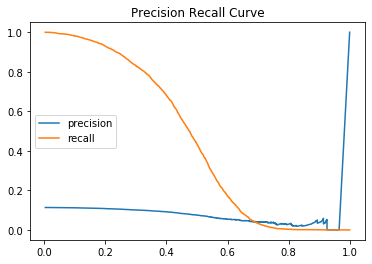

In [20]:
from sklearn.metrics import precision_recall_curve

y_test_num = y_test.copy()
y_test_num = y_test_num.replace('NO', 0)
y_test_num = y_test_num.replace('<30', 1)

model = lrmodel

y_score = model.predict_proba(x_test)[:, 1]
p, r, t = precision_recall_curve(y_test_num, y_score)
# adding last threshold of 1. to threshold list
t = np.concatenate((t, np.array([1.])))

plt.plot(t, p, label='precision')
plt.plot(t, r, label='recall')
plt.title('Precision Recall Curve')
plt.legend()

## Random undersampling:

In [21]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
lrmodel.fit(x_train_undersampled, y_train_undersampled)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Predict on test
y_pred = lrmodel.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         <30       0.18      0.58      0.28      2839
          NO       0.93      0.67      0.78     22190

    accuracy                           0.66     25029
   macro avg       0.55      0.62      0.53     25029
weighted avg       0.84      0.66      0.72     25029



## Grid search tuning of C for random undersampling:

In [24]:
# define the parameter values that should be searched
C_range = list(np.arange(0.1, 5.2, 0.2))
print(f"testing values of C: {C_range}")

# Logistic regression defaults to L2 normalization

# create a parameter grid: map the parameter names to the values that should be searched 
param_grid = dict(C=C_range)

# instantiate the grid
grid = GridSearchCV(lrmodel, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)

testing values of C: [0.1, 0.30000000000000004, 0.5000000000000001, 0.7000000000000001, 0.9000000000000001, 1.1000000000000003, 1.3000000000000003, 1.5000000000000004, 1.7000000000000004, 1.9000000000000004, 2.1000000000000005, 2.3000000000000007, 2.5000000000000004, 2.7000000000000006, 2.900000000000001, 3.1000000000000005, 3.3000000000000007, 3.500000000000001, 3.7000000000000006, 3.900000000000001, 4.1000000000000005, 4.300000000000001, 4.500000000000001, 4.7, 4.9, 5.1000000000000005]


In [25]:
# fit the grid with data 
grid.fit(x_train_undersampled, y_train_undersampled);

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6087679700134987
{'C': 0.30000000000000004}
LogisticRegression(C=0.30000000000000004, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [27]:
lrmodel = grid.best_estimator_
lrmodel.fit(x_train_undersampled, y_train_undersampled)
# Predict on test
y_pred = lrmodel.predict(x_test)

print(metrics.classification_report(y_test, y_pred))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

         <30       0.19      0.58      0.28      2839
          NO       0.93      0.67      0.78     22190

    accuracy                           0.66     25029
   macro avg       0.56      0.63      0.53     25029
weighted avg       0.84      0.66      0.72     25029



## Get the coefficients:

In [29]:
coefficients = pd.DataFrame({"Feature":x_train.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

In [30]:
coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

In [31]:
coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Feature,Coefficients,abs_val_coef
61,discharge_disposition_id_Hospice / home,1.097108,1.097108
49,discharge_disposition_id_Discharged/transferre...,-1.070155,1.070155
53,discharge_disposition_id_Discharged/transferre...,-1.054416,1.054416
58,discharge_disposition_id_Discharged/transferre...,-0.781946,0.781946
62,discharge_disposition_id_Hospice / medical fac...,0.736354,0.736354
55,discharge_disposition_id_Discharged/transferre...,-0.699101,0.699101
118,medical_specialty_Hematology,-0.695105,0.695105
50,discharge_disposition_id_Discharged/transferre...,0.642474,0.642474
141,medical_specialty_Pediatrics-Endocrinology,0.636529,0.636529
163,medical_specialty_Surgery-Cardiovascular,0.623612,0.623612


## Polynomial features:

In [32]:
poly = preprocessing.PolynomialFeatures(2, interaction_only=True)
x_train_poly_undersampled = poly.fit_transform(x_train_undersampled)

In [33]:
x_train_poly_undersampled.shape

(17036, 50404)

In [34]:
x_test_poly_undersampled = poly.transform(x_test)

In [35]:
lrmodel = linear_model.LogisticRegression(C=0.01) # increasing regularization due to polynomial features

lrmodel.fit(x_train_poly_undersampled, y_train_undersampled)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Predict on test
y_pred = lrmodel.predict(x_test_poly_undersampled)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         <30       0.17      0.59      0.27      2839
          NO       0.92      0.64      0.75     22190

    accuracy                           0.63     25029
   macro avg       0.55      0.61      0.51     25029
weighted avg       0.84      0.63      0.70     25029



## Get the coefficients:

In [38]:
coefficients = pd.DataFrame({"Feature":list(poly.get_feature_names(x_train.columns)),
                             "Coefficients":np.transpose(lrmodel.coef_[0,])})

coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Feature,Coefficients,abs_val_coef
371,time_in_hospital discharge_disposition_id_Disc...,-0.212142,0.212142
1974,number_emergency payer_code_HM,-0.175270,0.175270
16077,discharge_disposition_id_Discharged/transferre...,0.148421,0.148421
1129,num_procedures diag_1_Diseases Of The Genitour...,-0.147806,0.147806
16860,discharge_disposition_id_Discharged/transferre...,0.146285,0.146285
1000,num_procedures discharge_disposition_id_Discha...,0.136372,0.136372
527,time_in_hospital diag_2_Neoplasms,0.129712,0.129712
1772,number_outpatient diag_2_Diseases Of The Diges...,0.126632,0.126632
2554,number_diagnoses discharge_disposition_id_Disc...,0.126348,0.126348
43648,diag_2_Diseases Of The Circulatory System diag...,0.125063,0.125063


## Logistic with SMOTE:

In [39]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [40]:
# sns.countplot(y_test)

In [41]:
# sns.countplot(y_train_smote)

In [42]:
lrmodel = linear_model.LogisticRegression(C=1)
lrmodel.fit(x_train_smote, y_train_smote)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# Predict on test
y_pred = lrmodel.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         <30       0.17      0.57      0.27      2839
          NO       0.92      0.65      0.76     22190

    accuracy                           0.64     25029
   macro avg       0.55      0.61      0.52     25029
weighted avg       0.84      0.64      0.71     25029



## Get the coefficients:

In [44]:
coefficients = pd.DataFrame({"Feature":x_train.columns,"Coefficients":np.transpose(lrmodel.coef_[0,])})

coefficients['abs_val_coef'] = coefficients.Coefficients.abs()

coefficients.sort_values(by=['abs_val_coef'], ascending=False).head(10)

,Feature,Coefficients,abs_val_coef
61,discharge_disposition_id_Hospice / home,2.035973,2.035973
58,discharge_disposition_id_Discharged/transferre...,-1.682194,1.682194
49,discharge_disposition_id_Discharged/transferre...,-1.590913,1.590913
62,discharge_disposition_id_Hospice / medical fac...,1.446880,1.446880
196,"diag_2_Complications Of Pregnancy, Childbirth,...",1.376889,1.376889
53,discharge_disposition_id_Discharged/transferre...,-1.233454,1.233454
118,medical_specialty_Hematology,-1.209279,1.209279
216,"diag_3_Complications Of Pregnancy, Childbirth,...",1.118615,1.118615
134,medical_specialty_Otolaryngology,1.056595,1.056595
50,discharge_disposition_id_Discharged/transferre...,1.022799,1.022799
